<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/Crop_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # SAR Application: Crop Type
## I. How to create SAR quicklook images of crop type?
* Useful products for Annual Crops: Polarization ratios such as Volume Index; Temporal trends like Earliest Identifiable Timing (EIT), HH, HV, VV, VH power (backscatter)
* Wavelengths: L & C 
"In vegetated areas, shorter wavelengths such as X-band (3 cm) and C-band (6 cm) interact with the vegetation canopy, whereas longer wavelengths such as L-band (20 cm) and P-band (100 cm) are able to penetrate the vegetation cover and scatter off lower vegetation structures and soil. L and C-band SAR wavelengths are most effective for agricultural applications, as they are sensitive to fine-scale structure characteristics of different crop types and growth stages, while also detecting changes in soil moisture and other soil characteristics." (Whelen, Siqueira 2017).
* Relevant Sensors: UAVSAR, ALOS, Sentinel-1
* Qualitative Browse Products: How does the user know there is something in the image related to flooding before they develop/implement any algorithms? Vegetation structure, Volume Index, Earliest Identifiable Timing (EIT)

## II. How to interpret SAR images of crop type?
SAR is useful for agricultural applications, as it provides data about the vegetation structure and sensitivity to soil roughness and moisture content. 

For Annual Crops: Look at two RGBs: one for co-pol and one for cross-pol. Each RGB shows backscatter for 3 dates (e.g. red = winter, green = peak season, blue = midseason). Then, focus on a single crop and display volume index in winter vs. summer. For interpretation, temporal RGB helps distinguish crop types. Focusing on a given crop, temporal increase in volume ratio reveals timing of crop planting and crop productivity. Possibly compare with Landsat-8 NDVI time series.

For Perennial Crops: Dual pol: HH, HV, (HH/HV); quad-pol: H-alpha-entropy decomposition. For interpretation, volume decreases in areas with palms due to smaller canopy and large relative influence of cylindrial trunks. Entropy decreases in areas with monocrops since trees are planted in rows.


## San Joaquin Valley, California

This Jupyter Notebook explores UAVSAR data over the San Joaquin Valley in Calfornia. The content of this notebook is as follows:
1. [Running the Notebook](#s1)
2. [UAVSAR Pauli Decomposition RGB Images over agricultural fields](#s2)
3. [HV Backscatter](#s3)

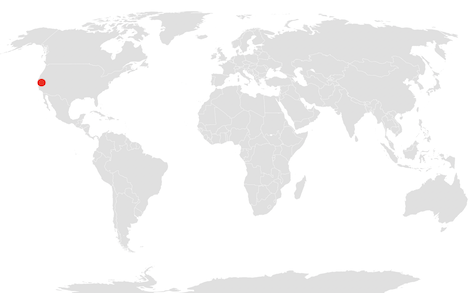

Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR) is an airborne radar instrument mounted on NASA's C-20A research aircraft. To gather information about the features on Earth, UAVSAR sends radio waves to the ground and measures the signals that reflect back to the sensor. When flown repeatedly over the same area, UAVSAR can measure small changes in the Earth's surface between flights by exploiting differences in the reflected signal.

<a name="s1"></a>
## 1. Running the Notebook

* To run the content, select the play button in the upper left corner of each code cell or press shift-enter.
* Link to data folder: https://drive.google.com/drive/folders/1cXPu-vDm2rsy6hmIzcMqKcpr7U0vgxsd?usp=sharing

### Python Packages:

This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported.

In [ ]:
# Installing rasterio and geopandas to Google Colab environment. May take a few minutes to run
!pip install rasterio --quiet
!pip install geopandas --quiet

import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path
from rasterio.plot import plotting_extent

from IPython.display import Image
import geopandas as gpd
import ipywidgets as wg
from traitlets import Bool
from ipywidgets import AppLayout, Button, Layout, HTML
from pathlib import Path
from typing import *
import os

     |████████████████████████████████| 19.3 MB 53.4 MB/s 
     |████████████████████████████████| 994 kB 14.8 MB/s 
     |████████████████████████████████| 15.4 MB 24 kB/s 
     |████████████████████████████████| 6.6 MB 37.0 MB/s 


<a name="s2"></a>
## 2. UAVSAR Pauli Decomposition RGB Images over agricultural fields in Stockon, California

UAVSAR is an L-Band airborne radar and has annual data acquistions of agriculture in California since 2009. 

* UAVSAR data download page: https://uavsar.jpl.nasa.gov/cgi-bin/data.pl
* UAVSAR website: https://uavsar.jpl.nasa.gov 

Here, we look at the UAVSAR flightline SDelta_23520, over Stockon, California. The slideshow shows the Pauli Decomposition RGB to highlight changes in these Stockon agricultural fields across 2010 seasons.

In [ ]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Play-(Animation)-widget

def function(x):
    if x == '05/10/2010':
        return Image(filename='SDelta_23520_100510.png')
    elif x == '07/12/2010':
        return Image(filename='SDelta_23520_100712.png')
    elif x == '10/25/2010':
        return Image(filename='SDelta_23520_101025.png')
    else:
        return Image(filename='SDelta_23520_100114.png')


wg.interact(function, x= wg.SelectionSlider(
    options=['05/10/2010', '07/12/2010','10/25/2010','01/14/2010'],
    value='05/10/2010',
    description='Pauli RGB',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Pauli RGB', options=('05/10/2010',…

<function __main__.function>

The figure below is from Whelen and Siqueira's 2017 paper and is centered on the same extent as the Pauli RGB slideshow.

Whelen and Siqueira's 2017 paper "Use of time-series L-band UAVSAR data for the classification of agricultural fields in the San Joaquin Valley" used a UAVSAR time series from 2010-2012 over agricultural fields in the Central Valley to classify different crops. The UAVSAR line was SDelta_23520 over Stockon, California.

To classify the crops, HV power and entropy HV backscatter can each be compared at different dates. These comparisons assist with differentiating crop types for classification, since annual crops may differ in timing of planting and growth. For example, Whelen and Siqueira used UAVSAR backscatter to capture these temporal trends, and their time series were able to distinguish alfafa, winter wheat, and corn crops.

From paper: "Distinguishable signatures were observed for all three crops. The signature was dominated by the growth stage and physical structure of the crops during the mature part of thegrowing season, and by weather events, planting practices, and harvesting procedures during other parts of the year." 

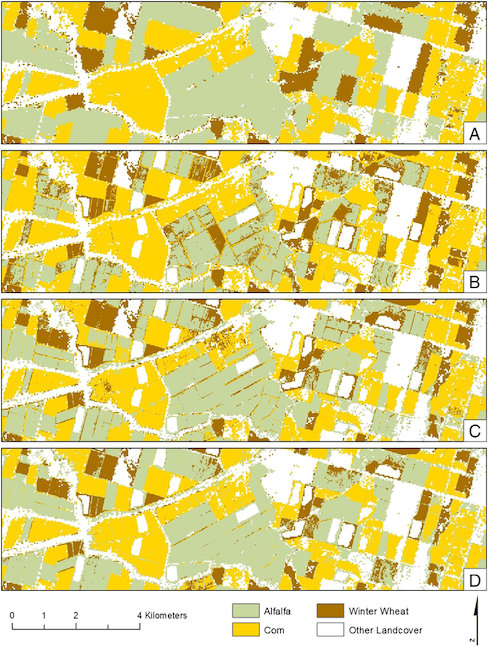


Figure 6. Classification results using the time series error metric given by Eq. (1) for the 2010 Cropland Data Layer (A: CDL) and (B) the 2010 HV-polarized backscatter, (C) the 2010 alpha
classification, and (D) the 2010 entropy classification. The field regions missing from the classifications are areas of training pixels. Similar results and accuracies have been noted when
using the 2010 time series-derived classifier on UAVSAR data collected in 2012.  

** Add more information on the methods used in the paper to explain B-D. What is the entropy product?

** Better label (below) and with the Pauli Decomposition, the different crop areas
** Could have a histogram to show the variation (already have variation bar on time series)

From USDA 2010 Cropland Layer, Alfalfa is code 36, Corn is code 1, and Winter Wheat is code 24. 

<a name="s3"></a>
## 3. HV Backscatter

Here, we read in UAVSAR HV geotiffs from 2010, convert them to decibels, and compare with the USDA cropland layer. 

#### UAVSAR data product pages:


January 14, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10007_002_100114_L090_CX_01#data

March 3, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10025_005_100303_L090_CX_01#data

April 09, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10026_002_100409_L090_CX_01#data

May 10, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10036_002_100510_L090_CX_01#data

June 17, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10051_002_100617_L090_CX_01#data

July 12, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10059_008_100712_L090_CX_01#data

August 10, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10068_002_100810_L090_CX_01#data

October 25, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10075_003_101025_L090_CX_01#data

November 30, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10083_002_101130_L090_CX_01#data

1. Fetch UAVSAR geotiffs with wget. Then, read in HV geotiffs, cropped to agricultural fields in Stockon, California. 

In [ ]:
!wget

In [ ]:
# Read in files
def read_file(path):
  with rio.open(path) as ds:
    band = ds.read(1)
    return band

Jan2010 = read_file('SDelta_23520_100114_HV.tif')
March2010 = read_file('SDelta_23520_100303_HV.tif')
April2010 = read_file('SDelta_23520_100409_HV.tif')
May2010 = read_file('SDelta_23520_100510_HV.tif')
June2010 = read_file('SDelta_23520_100617_HV.tif')
July2010 = read_file('SDelta_23520_100712_HV.tif')
August2010 = read_file('SDelta_23520_100810_HV.tif')
October2010 = read_file('SDelta_23520_101025_HV.tif')
November2010 = read_file('SDelta_23520_101130_HV.tif')

2. Convert HV geotiffs to decibels from linear power

In [ ]:
# Convert to decibels
def convert_db_v1(data):
  db = 10*(math.log10(data))
  return db
convert_db = np.vectorize(convert_db_v1)

Jan2010 = convert_db(Jan2010)
March2010 = convert_db(March2010)
April2010 = convert_db(April2010)
May2010 = convert_db(May2010)
June2010 = convert_db(June2010)
July2010 = convert_db(July2010)
August2010 = convert_db(August2010)
October2010 = convert_db(October2010)
November2010 = convert_db(November2010)

Get geotiff extents to overlay with USDA crop layer

In [ ]:
with rio.open('SDelta_23520_100114_HV.tif') as subset_src:
    subset_extent = plotting_extent(subset_src)

top_left_lon = -121.51980413999999
top_left_lat = 37.94000718

extent_mat = (top_left_lon, top_left_lon + subset_src.shape[1] * 0.00005556000000000000337, top_left_lat - subset_src.shape[0] * 0.00005556000000000000337, top_left_lat)
extent_mat

(-121.51980413999999, -121.42001837999999, 37.87800222, 37.94000718)

3. Read in 2010 USDA Cropland Data Layer and Plot with HV Tifs 
USDA Cropland Layer: https://www.nass.usda.gov/Research_and_Science/Cropland/Release/

In [ ]:
corn_boundary = gpd.read_file('corn_2010_clip.shp')
alfalfa_boundary = gpd.read_file('alfalfa_2010_clip.shp')
winterwheat_boundary = gpd.read_file('winterwheat_2010_clip.shp')

corn_boundary = corn_boundary.to_crs(subset_src.crs)
alfalfa_boundary = alfalfa_boundary.to_crs(subset_src.crs)
winterwheat_boundary = winterwheat_boundary.to_crs(subset_src.crs)

Text(0.5, 1.0, 'Jan2010')

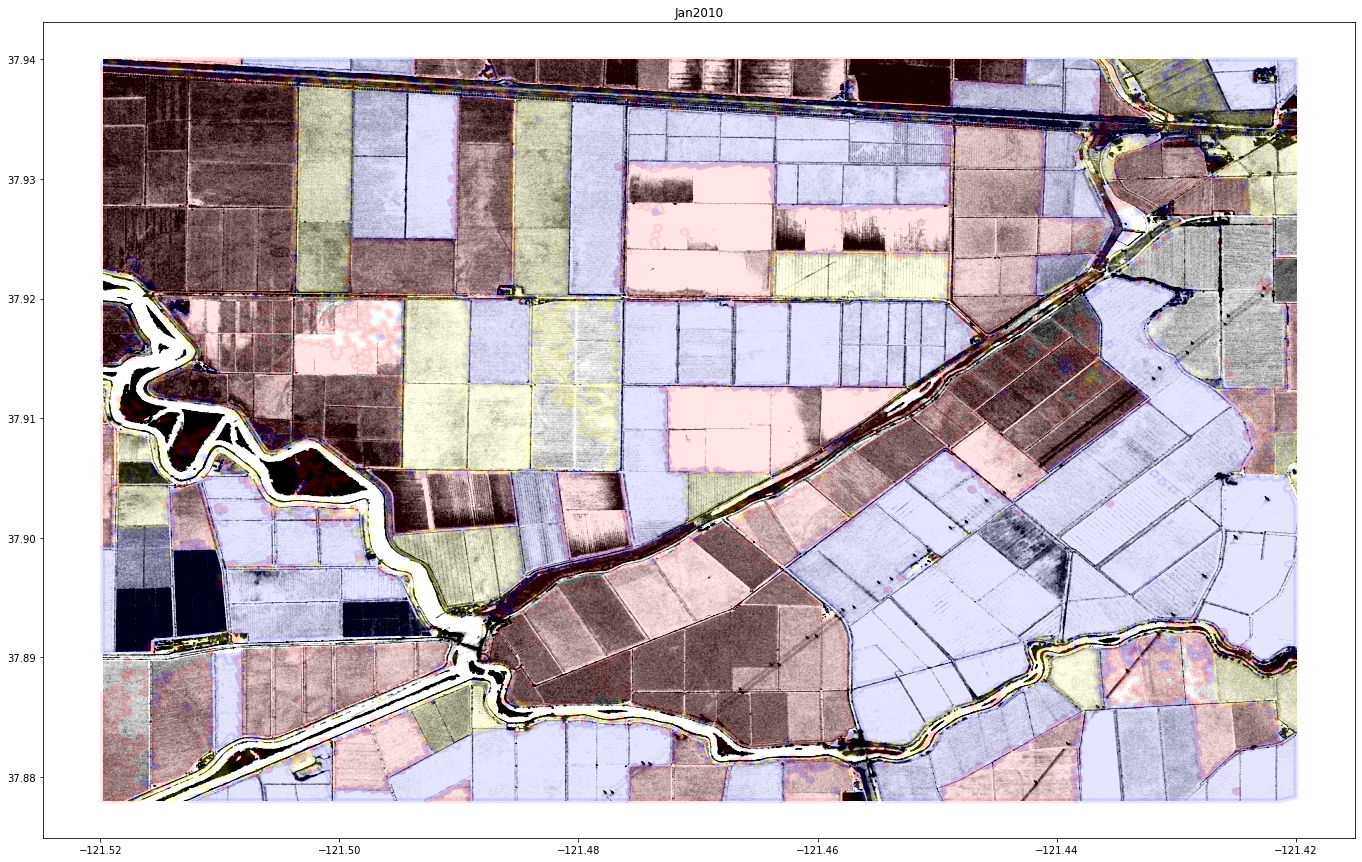

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(20,15))

corn_boundary.plot(edgecolor='red', facecolor='red', ax=ax1, linewidth=5, alpha = 0.1)
alfalfa_boundary.plot(edgecolor='blue', facecolor='blue', ax=ax1, linewidth=5, alpha = 0.1)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='yellow', ax=ax1, linewidth=5, alpha = 0.1)
ax1.autoscale(False)
ax1.imshow(Jan2010, vmin=-35, vmax=-20, cmap="Greys", extent=extent_mat) #"Greys"
ax1.set_title('Jan2010')

4. Overlay USDA cropland layer unto UAVSAR acquistions.

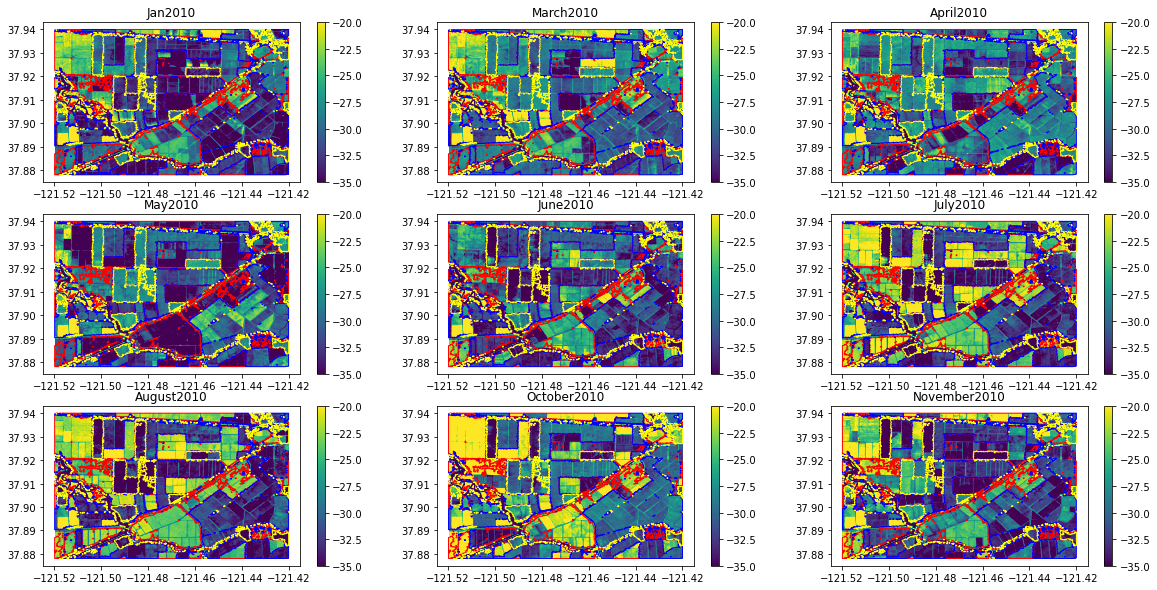

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax1)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax1)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax1)
ax1.autoscale(False)
Jan2010 = ax1.imshow(Jan2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax1.set_title('Jan2010')
fig.colorbar(Jan2010, ax=ax1)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax2)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax2)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax2)
ax2.autoscale(False)
March2010 = ax2.imshow(March2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax2.set_title('March2010')
fig.colorbar(March2010, ax=ax2)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax3)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax3)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax3)
ax3.autoscale(False)
April2010 = ax3.imshow(April2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax3.set_title('April2010')
fig.colorbar(April2010, ax=ax3)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax4)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax4)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax4)
ax4.autoscale(False)
May2010 = ax4.imshow(May2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax4.set_title('May2010')
fig.colorbar(May2010, ax=ax4)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax5)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax5)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax5)
ax5.autoscale(False)
June2010 = ax5.imshow(June2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax5.set_title('June2010')
fig.colorbar(June2010, ax=ax5)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax6)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax6)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax6)
ax6.autoscale(False)
July2010 = ax6.imshow(July2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax6.set_title('July2010')
fig.colorbar(July2010, ax=ax6)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax7)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax7)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax7)
ax7.autoscale(False)
August2010 = ax7.imshow(August2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax7.set_title('August2010')
fig.colorbar(August2010, ax=ax7)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax8)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax8)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax8)
ax8.autoscale(False)
October2010 = ax8.imshow(October2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax8.set_title('October2010')
fig.colorbar(October2010, ax=ax8)

corn_boundary.plot(edgecolor='red', facecolor='none', ax=ax9)
alfalfa_boundary.plot(edgecolor='blue', facecolor='none', ax=ax9)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='none', ax=ax9)
ax9.autoscale(False)
November2010 = ax9.imshow(November2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax9.set_title('November2010')
fig.colorbar(November2010, ax=ax9)

### HV Backscatter Time Series
HV backscatter for different dates compared to Whelen and Siqueira Figure 3. 


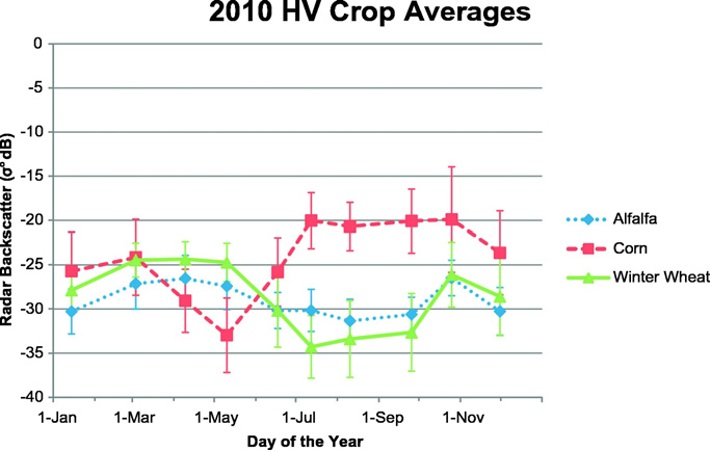

Figure 3: HV-polarized crop averages for the 2010 growing year. Each point on a line shows
the mean of the field averages from one image for that crop-year-polarization
combination. Error bars show one standard deviation for that population of twenty-five
field means determined on the day of observation.

## Other Resources

## References
Whelen, T. Siqueira, P. (2017). Use of time-series L-band UAVSAR data for the classification of agricultural fields in the San Joaquin Valley. Remote Sensing of Environment 193, 216-224. DOI: 10.1016/j.rse.2017.03.014 (https://www.researchgate.net/publication/315725679_Use_of_time-series_L-band_UAVSAR_data_for_the_classification_of_agricultural_fields_in_the_San_Joaquin_Valley)

USDA Cropland Layer: https://www.nass.usda.gov/Research_and_Science/Cropland/Release/

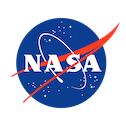


The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 